# Import libraries

In [1]:
# Import pandas, numpy, seabon, sklearn, pyplot
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import swifter

from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans

pd.set_option('max.rows', None)
pd.set_option('max.columns', None)

%matplotlib inline

In [2]:
from config_and_dependencies.config import *

# Import Data

In [3]:
mydata = pd.read_csv(data_input_path)

In [4]:
mydata.head()

,REF,DENOMINATION,OBVERSE,REVERSE,MINT,EMPEROR,NAMED,HOARD,WEIGHT,DONOR,DONORREF,WALKER,COMMENTS,ARSENIC,GOLD,COPPER,IRON,NICKEL,LEAD,ANTIMONY,TIN,ZINC,MANGANESE,CHROMIUM,COBALT,SILVER,BISMUTH,BULLION
0,A7,Tetradrachm,"ΤΙΒΕΡΙΟΣ ΚΑΙΣΑΡ ΣΕΒΑΣΤΟΣ, laur. hd. r.","ΘΕΟΣ ΣΕΒΑΣΤΟΣ, radiate head of Augustus, l. Yr...",Alexandria,Tiberius,<null>,<null>,13.35,Ashmolean Museum,NaN,-1.0,NaN,0.085,0.08,71.70,0.003,0.0226,0.21,0.010,0.0035,0.0003,0.0001,0.0001,0.0154,27.87,0.001,28.16
1,A8,Tetradrachm,"ΤΙΒΕΡΙΟΣ ΚΑΙΣΑΡ ΣΕΒΑΣΤΟΣ, laur. hd. r.","ΘΕΟΣ ΣΕΒΑΣΤΟΣ, radiate head of Augustus, r.",Alexandria,Tiberius,<null>,<null>,13.86,Ashmolean Museum,NaN,NaN,NaN,0.016,0.16,75.43,0.008,0.0084,0.23,0.012,0.0012,0.0001,0.0001,0.0001,0.0003,24.14,0.001,24.52
2,A9,Tetradrachm,"ΤΙΒΕΡΙΟΣ ΚΑΙΣΑΡ ΣΕΒΑΣΤΟΣ, laur. hd. r.","ΘΕΟΣ ΣΕΒΑΣΤΟΣ, radiate head of Augustus, r.",Alexandria,Tiberius,<null>,<null>,13.57,Ashmolean Museum,NaN,NaN,NaN,0.012,0.17,74.10,0.004,0.0068,0.18,0.028,0.0012,0.0001,0.0001,0.0001,0.0001,25.50,0.001,25.85
3,KB4,Drachm,"C CAESAR AVG GERMANICVS, hd., r.","IMPERATOR PONT MAX TR POT, simpulum and lituus..",Caesarea,Caligula,<null>,<null>,NaN,Private,MGH,NaN,NaN,0.009,0.59,12.20,0.002,0.0004,0.38,0.003,0.0020,0.0002,0.0002,0.0002,0.0002,86.81,0.001,87.78
4,A10,Drachm,"ΤΙΒΕΡΙΟΣ ΚΑΙΣΑΡ ΣΕΒΑΣΤΟΣ, laur. Hd., r.","ΘΕΟΥ ΣΕΒΑΣΤΟΣ ΥΙΟΣ, Mount Argaeus, surmounted ...",Caesarea,Tiberius,<null>,<null>,3.62,Ashmolean Museum,NaN,-1.0,NaN,0.015,0.46,31.70,0.008,0.0047,0.20,0.079,0.0782,0.0009,0.0003,0.0006,0.0003,67.45,0.001,68.11


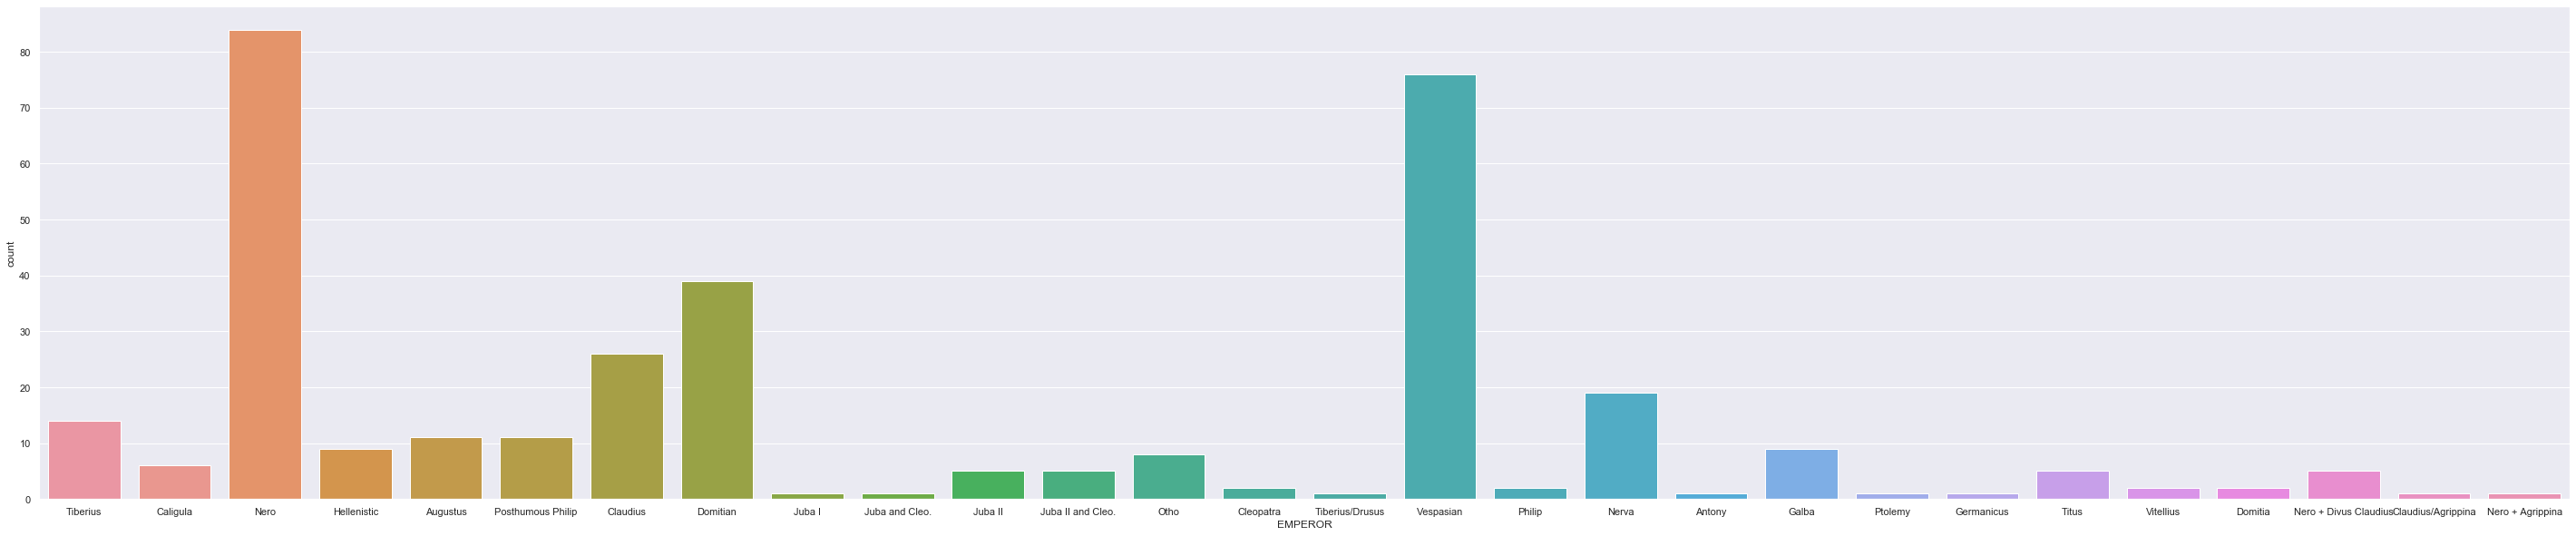

In [5]:
sns.set(rc={'figure.figsize':(50,10)})
sns.countplot(mydata['EMPEROR'])

# Descriptive Statistics

In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 28 columns):
REF             348 non-null object
DENOMINATION    330 non-null object
OBVERSE         170 non-null object
REVERSE         303 non-null object
MINT            347 non-null object
EMPEROR         348 non-null object
NAMED           348 non-null object
HOARD           348 non-null object
WEIGHT          347 non-null object
DONOR           346 non-null object
DONORREF        157 non-null object
WALKER          33 non-null float64
COMMENTS        148 non-null object
ARSENIC         348 non-null float64
GOLD            348 non-null float64
COPPER          348 non-null float64
IRON            348 non-null float64
NICKEL          348 non-null float64
LEAD            348 non-null float64
ANTIMONY        348 non-null float64
TIN             348 non-null float64
ZINC            348 non-null float64
MANGANESE       348 non-null float64
CHROMIUM        348 non-null float64
COBALT          348 

In [7]:
mydata.describe()

,WALKER,ARSENIC,GOLD,COPPER,IRON,NICKEL,LEAD,ANTIMONY,TIN,ZINC,MANGANESE,CHROMIUM,COBALT,SILVER,BISMUTH,BULLION
count,33.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,346.000000
mean,-1.0,0.040793,0.360201,44.274770,0.011374,0.011631,0.447701,0.025233,0.052014,0.002442,0.000245,0.000470,0.010512,54.819943,0.028730,55.702977
std,0.0,0.042047,0.303581,25.766074,0.033140,0.030227,1.110356,0.022330,0.432588,0.012674,0.000629,0.001652,0.040516,25.607483,0.058649,25.872506
min,-1.0,0.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000,2.040000
25%,-1.0,0.015000,0.150000,27.447500,0.002000,0.003300,0.170000,0.011000,0.001000,0.000100,0.000100,0.000100,0.000200,23.542500,0.001000,23.925000
50%,-1.0,0.024000,0.330000,33.400000,0.005000,0.006200,0.290000,0.019500,0.002100,0.000500,0.000100,0.000100,0.000400,65.400000,0.011000,66.560000
75%,-1.0,0.051250,0.500000,75.872500,0.010000,0.013850,0.485000,0.031000,0.014225,0.001225,0.000200,0.000300,0.003000,71.485000,0.033000,72.440000
max,-1.0,0.205000,3.120000,97.620000,0.465000,0.544500,20.160000,0.140000,7.922600,0.221100,0.010600,0.019000,0.402400,98.820000,0.578000,99.090000


In [8]:
mydata.nunique()

REF             348
DENOMINATION      9
OBVERSE          94
REVERSE         206
MINT             16
EMPEROR          28
NAMED             1
HOARD             2
WEIGHT          100
DONOR            14
DONORREF        155
WALKER            1
COMMENTS         78
ARSENIC         106
GOLD             82
COPPER          332
IRON             47
NICKEL          168
LEAD             95
ANTIMONY         74
TIN             158
ZINC             63
MANGANESE        14
CHROMIUM         29
COBALT          103
SILVER          334
BISMUTH          90
BULLION         335
dtype: int64

In [9]:
mydata[features_start:features_end].groupby(mydata['MINT']).describe()

WALKER                                    ARSENIC            \
                   count mean  std  min  25%  50%  75%  max   count      mean   
MINT                                                                            
Alexandria           4.0 -1.0  0.0 -1.0 -1.0 -1.0 -1.0 -1.0   100.0  0.057280   
Antioch             13.0 -1.0  0.0 -1.0 -1.0 -1.0 -1.0 -1.0   140.0  0.027121   
Asia                 4.0 -1.0  0.0 -1.0 -1.0 -1.0 -1.0 -1.0     7.0  0.052429   
Caesarea             3.0 -1.0  0.0 -1.0 -1.0 -1.0 -1.0 -1.0    32.0  0.094156   
Cyprus               0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN    10.0  0.013600   
Ephesus              0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN     4.0  0.009500   
FALSE                0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN     1.0  0.136000   
Judaea               0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN     3.0  0.026000   
Lycia                1.0 -1.0  NaN -1.0 -1.0 -1.0 -1.0 -1.0     1.0  0.003000   
Mauretania           0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN    12.0  0.010917   
Numidia              0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN     1.0  0.113000   
Pergamon/Ephesus?    0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN     6.0  0.008833   
Seleucia             0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN     2.0  0.042000   
Syria                0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN     4.0  0.029500   
Tarsus               0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN     2.0  0.020000   
Tyre                 1.0 -1.0  NaN -1.0 -1.0 -1.0 -1.0 -1.0     7.0  0.008571   

                                                                      GOLD  \
                        std    min      25%     50%      75%    max  count   
MINT                                                                         
Alexandria         0.033861  0.006  0.03700  0.0530  0.06900  0.189  100.0   
Antioch            0.020174  0.003  0.01500  0.0210  0.03000  0.113  140.0   
Asia               0.034976  0.005  0.03900  0.0460  0.06000  0.118    7.0   
Caesarea           0.084674  0.000  0.00975  0.0685  0.17650  0.205   32.0   
Cyprus             0.005835  0.004  0.00850  0.0160  0.01775  0.021   10.0   
Ephesus            0.006557  0.003  0.00525  0.0085  0.01275  0.018    4.0   
FALSE                   NaN  0.136  0.13600  0.1360  0.13600  0.136    1.0   
Judaea             0.011000  0.015  0.02050  0.0260  0.03150  0.037    3.0   
Lycia                   NaN  0.003  0.00300  0.0030  0.00300  0.003    1.0   
Mauretania         0.005054  0.005  0.00775  0.0095  0.01275  0.023   12.0   
Numidia                 NaN  0.113  0.11300  0.1130  0.11300  0.113    1.0   
Pergamon/Ephesus?  0.005636  0.002  0.00500  0.0080  0.01325  0.016    6.0   
Seleucia           0.001414  0.041  0.04150  0.0420  0.04250  0.043    2.0   
Syria              0.008583  0.019  0.02425  0.0310  0.03625  0.037    4.0   
Tarsus             0.005657  0.016  0.01800  0.0200  0.02200  0.024    2.0   
Tyre               0.013151  0.001  0.00200  0.0050  0.00600  0.038    7.0   

                                                                          \
                       mean       std   min     25%    50%     75%   max   
MINT                                                                       
Alexandria         0.132600  0.043892  0.01  0.1000  0.130  0.1600  0.26   
Antioch            0.433571  0.136709  0.02  0.3475  0.450  0.5200  1.00   
Asia               0.322857  0.239285  0.05  0.1350  0.230  0.5500  0.61   
Caesarea           0.275312  0.189583  0.01  0.1150  0.290  0.4175  0.62   
Cyprus             0.458000  0.208689  0.20  0.2850  0.410  0.6125  0.79   
Ephesus            0.220000  0.257811  0.01  0.0175  0.160  0.3625  0.55   
FALSE              0.000000       NaN  0.00  0.0000  0.000  0.0000  0.00   
Judaea             0.340000  0.000000  0.34  0.3400  0.340  0.3400  0.34   
Lycia              0.020000       NaN  0.02  0.0200  0.020  0.0200  0.02   
Mauretania         1.373333  0.767657  0.39  0.8900  1.315  1.6050  3.12   
Numidia

# PCA

In [59]:
my_pallete = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#000000']

In [60]:
df = mydata.iloc[:,features_start:features_end]

In [61]:
df.head()

,ARSENIC,GOLD,COPPER,IRON,NICKEL,LEAD,ANTIMONY,TIN,ZINC,MANGANESE,CHROMIUM,COBALT,SILVER
0,0.085,0.08,71.70,0.003,0.0226,0.21,0.010,0.0035,0.0003,0.0001,0.0001,0.0154,27.87
1,0.016,0.16,75.43,0.008,0.0084,0.23,0.012,0.0012,0.0001,0.0001,0.0001,0.0003,24.14
2,0.012,0.17,74.10,0.004,0.0068,0.18,0.028,0.0012,0.0001,0.0001,0.0001,0.0001,25.50
3,0.009,0.59,12.20,0.002,0.0004,0.38,0.003,0.0020,0.0002,0.0002,0.0002,0.0002,86.81
4,0.015,0.46,31.70,0.008,0.0047,0.20,0.079,0.0782,0.0009,0.0003,0.0006,0.0003,67.45


In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [64]:
scaled_data = scaler.transform(df)

In [65]:
from sklearn.decomposition import PCA

In [66]:
pca = PCA(n_components=2)

In [67]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [68]:
x_pca = pca.transform(scaled_data)

In [69]:
#print(x_pca)

In [70]:
scaled_data.shape

(348, 13)

In [71]:
x_pca.shape

(348, 2)

In [72]:
RefCol = pd.DataFrame(data=mydata['REF'])

In [73]:
RefCol.head()

,REF
0,A7
1,A8
2,A9
3,KB4
4,A10


In [74]:
PCA_DF = pd.DataFrame(data=x_pca)

In [75]:
#PCA_DF.head()

In [76]:
EmpCol = mydata['EMPEROR']

In [78]:
%store EmpCol

Stored 'EmpCol' (Series)


In [79]:
EmpCol_RefCol_PCAs = pd.concat([EmpCol, RefCol, PCA_DF], axis=1)

In [80]:
#EmpCol_RefCol_PCAs.head()

In [81]:
EmpCol_RefCol_PCAs.columns = ['EMPEROR', 'REF', 'PC1', 'PC2']

In [82]:
#EmpCol_RefCol_PCAs.head()

In [83]:
%store EmpCol_RefCol_PCAs

Stored 'EmpCol_RefCol_PCAs' (DataFrame)


# tSNE

In [84]:
from sklearn.manifold import TSNE

In [85]:
test_data = mydata.iloc[:,features_start:features_end]

In [86]:
test_data.head()

,ARSENIC,GOLD,COPPER,IRON,NICKEL,LEAD,ANTIMONY,TIN,ZINC,MANGANESE,CHROMIUM,COBALT,SILVER
0,0.085,0.08,71.70,0.003,0.0226,0.21,0.010,0.0035,0.0003,0.0001,0.0001,0.0154,27.87
1,0.016,0.16,75.43,0.008,0.0084,0.23,0.012,0.0012,0.0001,0.0001,0.0001,0.0003,24.14
2,0.012,0.17,74.10,0.004,0.0068,0.18,0.028,0.0012,0.0001,0.0001,0.0001,0.0001,25.50
3,0.009,0.59,12.20,0.002,0.0004,0.38,0.003,0.0020,0.0002,0.0002,0.0002,0.0002,86.81
4,0.015,0.46,31.70,0.008,0.0047,0.20,0.079,0.0782,0.0009,0.0003,0.0006,0.0003,67.45


In [87]:
%store test_data

Stored 'test_data' (DataFrame)


In [88]:
#element_data_test = test_data[test_data.columns.values[features_start:features_end]]

In [89]:
#element_data_test.head()

In [90]:
my_scaler_test = StandardScaler()

In [91]:
#element_data_test_scaled = my_scaler_test.fit_transform(element_data_test)
element_data_test_scaled = my_scaler_test.fit_transform(test_data)

In [92]:
#print(element_data_test_scaled)

In [93]:
my_tsne_test = TSNE(n_components=2, perplexity=25, learning_rate=200, n_iter=2000, verbose=3).fit_transform(element_data_test_scaled)

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 348 samples in 0.001s...
[t-SNE] Computed neighbors for 348 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 348 / 348
[t-SNE] Mean sigma: 0.526424
[t-SNE] Computed conditional probabilities in 0.014s
[t-SNE] Iteration 50: error = 61.5283508, gradient norm = 0.4999314 (50 iterations in 0.095s)
[t-SNE] Iteration 100: error = 60.1949005, gradient norm = 0.5277953 (50 iterations in 0.099s)
[t-SNE] Iteration 150: error = 61.1567039, gradient norm = 0.5098734 (50 iterations in 0.093s)
[t-SNE] Iteration 200: error = 60.9428596, gradient norm = 0.5046829 (50 iterations in 0.094s)
[t-SNE] Iteration 250: error = 61.4014626, gradient norm = 0.5139069 (50 iterations in 0.096s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.401463
[t-SNE] Iteration 300: error = 0.5221648, gradient norm = 0.0032408 (50 iterations in 0.074s)
[t-SNE] Iteration 350: error = 0.4491676, gradient norm = 0.0013461 (

In [94]:
tsne_df_test = pd.DataFrame(data = my_tsne_test, columns = ['tsne1', 'tsne2'])#, 'tsne3'])

In [95]:
#tsne_df_test.head()

### Add MINT back in

In [96]:
EmpCol = mydata['EMPEROR']

In [97]:
tsne_df_EmpCol_comb = pd.concat([tsne_df_test, EmpCol], axis=1)

In [98]:
#tsne_df_EmpCol_comb.head()

In [99]:
%store tsne_df_EmpCol_comb

Stored 'tsne_df_EmpCol_comb' (DataFrame)


# KMeans

In [49]:
df = test_data

In [50]:
df.head()

,ARSENIC,GOLD,COPPER,IRON,NICKEL,LEAD,ANTIMONY,TIN,ZINC,MANGANESE,CHROMIUM,COBALT,SILVER
0,0.085,0.08,71.70,0.003,0.0226,0.21,0.010,0.0035,0.0003,0.0001,0.0001,0.0154,27.87
1,0.016,0.16,75.43,0.008,0.0084,0.23,0.012,0.0012,0.0001,0.0001,0.0001,0.0003,24.14
2,0.012,0.17,74.10,0.004,0.0068,0.18,0.028,0.0012,0.0001,0.0001,0.0001,0.0001,25.50
3,0.009,0.59,12.20,0.002,0.0004,0.38,0.003,0.0020,0.0002,0.0002,0.0002,0.0002,86.81
4,0.015,0.46,31.70,0.008,0.0047,0.20,0.079,0.0782,0.0009,0.0003,0.0006,0.0003,67.45


In [51]:
from sklearn.cluster import KMeans, SpectralClustering

In [52]:
# Standardize the data
X_std = StandardScaler().fit_transform(df)


In [53]:
print(X_std[1])

[-0.5905058  -0.66041416  1.21089811 -0.10194479 -0.10704626 -0.1963466
 -0.5934603  -0.11763519 -0.18507027 -0.23136632 -0.22397475 -0.25240496
 -1.19981015]


In [54]:
# Run local implementation of kmeans
km = KMeans(n_clusters=14, max_iter=300)
km.fit(X_std)
centroids = km.cluster_centers_
y_kmeans = km.predict(X_std)
kmeans.labels_

# Plot the clustered data
fig, ax = plt.subplots(figsize=(10, 10))

plt.scatter(X_std[:,0], X_std[:,9], c=y_kmeans, cmap='viridis', label='cluster')
#plt.scatter(X_std[:,2], X_std[:,3], c='blue', label='cluster 2')
#plt.scatter(centroids[:, 12], centroids[:, 9], marker='*', s=300, c='r', label='centroid')

plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('SILVER')
plt.ylabel('CHROMIUM')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

NameError: name 'kmeans' is not defined